# 🚀 **AVANCE 3 - PROYECTO INTEGRADOR**
## 📊 **Análisis de Datos y Preparación para Modelado de Machine Learning**

---

### 📋 **Objetivos del Avance:**
- ✅ **Feature Engineering:** Crear variables derivadas relevantes
- ✅ **Detección de Outliers:** Identificar valores atípicos en las ventas
- ✅ **Análisis Temporal:** Extraer patrones de tiempo de las ventas
- ✅ **Dataset Final:** Preparar datos para modelado de ML

---

## 📁 **CARGA DE ARCHIVOS CSV**

### 🗂️ **Archivos de Datos Disponibles:**
| **Archivo** | **Descripción** | **Registros** |
|-------------|-----------------|---------------|
| `categories.csv` | Categorías de productos | ~10 categorías |
| `cities.csv` | Información de ciudades | ~100 ciudades |
| `countries.csv` | Información de países | ~200 países |
| `customers.csv` | Datos de clientes | ~98,000 clientes |
| `employees.csv` | Datos de empleados | ~25 empleados |
| `products.csv` | Catálogo de productos | ~450 productos |
| `sales.csv` | Registro de ventas | ~6.7M ventas |

---

In [179]:
# 📚 **IMPORTACIÓN DE LIBRERÍAS Y CARGA DE DATOS**
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

print("🔄 Cargando archivos CSV...")

# Cargar todos los archivos de datos
categories = pd.read_csv('../data/categories.csv')
cities = pd.read_csv('../data/cities.csv')
countries = pd.read_csv('../data/countries.csv')
customers = pd.read_csv('../data/customers.csv')
employees = pd.read_csv('../data/employees.csv')
products = pd.read_csv('../data/products.csv')
sales = pd.read_csv('../data/sales.csv')

print("✅ Todos los archivos cargados exitosamente!")
print(f"📊 Total de ventas: {len(sales):,} registros")
print(f"👥 Total de empleados: {len(employees)} empleados")
print(f"🛍️ Total de productos: {len(products)} productos")


🔄 Cargando archivos CSV...
✅ Todos los archivos cargados exitosamente!
📊 Total de ventas: 6,758,125 registros
👥 Total de empleados: 23 empleados
🛍️ Total de productos: 452 productos


## 🔧 **PREGUNTA 1: CÁLCULO DE PRECIO REAL DE VENTAS**

### 🎯 **Problema Identificado:**
El campo `TotalPrice` en la tabla `sales` **no tiene valores válidos** (todos son 0).

### 💡 **Solución Propuesta:**
Utilizar la información de precios de la tabla `products` para calcular el valor real de cada venta.

### 📐 **Fórmula de Cálculo:**
```
TotalPriceCalculated = (Quantity × Price) × (1 - Discount)
```

### 🔍 **Análisis Previo:**
- Verificar estructura de la tabla `sales`
- Analizar distribución de valores en `TotalPrice`
- Revisar información disponible en `products`

---

In [180]:
# 🔍 **ANÁLISIS DE LA TABLA SALES**
print("📊 Información de la tabla 'sales':")
print("=" * 50)
sales.info()

print(f"\n📈 Resumen estadístico:")
print(f"• Total de registros: {len(sales):,}")
print(f"• Memoria utilizada: {sales.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Columnas disponibles: {len(sales.columns)}")

📊 Información de la tabla 'sales':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 464.0+ MB

📈 Resumen estadístico:
• Total de registros: 6,758,125
• Memoria utilizada: 1267.1 MB
• Columnas disponibles: 9


In [181]:
# 📊 **ANÁLISIS DE VALORES EN TotalPrice**
print("🔍 Distribución de valores en 'TotalPrice':")
print("=" * 50)

conteo_valores = sales['TotalPrice'].value_counts().sort_index()
print(conteo_valores)

print(f"\n⚠️  PROBLEMA DETECTADO:")
print(f"• Todos los valores de TotalPrice son: {sales['TotalPrice'].unique()}")
print(f"• Porcentaje de valores 0: {sales['TotalPrice'].value_counts()[0] / len(sales) * 100:.1f}%")
print(f"• Necesitamos calcular el precio real usando la tabla 'products'")

🔍 Distribución de valores en 'TotalPrice':
TotalPrice
0.00    6758125
Name: count, dtype: int64

⚠️  PROBLEMA DETECTADO:
• Todos los valores de TotalPrice son: [0.]
• Porcentaje de valores 0: 100.0%
• Necesitamos calcular el precio real usando la tabla 'products'


In [182]:
# 🛍️ **ANÁLISIS DE LA TABLA PRODUCTS**
print("📊 Información de la tabla 'products':")
print("=" * 50)
products.info()

print(f"\n📈 Resumen de productos:")
print(f"• Total de productos: {len(products):,}")
print(f"• Rango de precios: ${products['Price'].min():.2f} - ${products['Price'].max():.2f}")
print(f"• Precio promedio: ${products['Price'].mean():.2f}")
print(f"• Categorías disponibles: {products['CategoryID'].nunique()}")

📊 Información de la tabla 'products':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     452 non-null    int64  
 1   ProductName   452 non-null    object 
 2   Price         452 non-null    float64
 3   CategoryID    452 non-null    int64  
 4   Class         452 non-null    object 
 5   ModifyDate    452 non-null    object 
 6   Resistant     452 non-null    object 
 7   IsAllergic    452 non-null    object 
 8   VitalityDays  452 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 31.9+ KB

📈 Resumen de productos:
• Total de productos: 452
• Rango de precios: $0.00 - $99.88
• Precio promedio: $50.61
• Categorías disponibles: 11


In [183]:
# 💰 **CÁLCULO DEL VALOR REAL DE VENTAS**
print("🔄 Calculando precios reales de ventas...")
print("=" * 50)

# Hacer merge para combinar las tablas sales y products
sales_products = sales.merge(products[['ProductID', 'Price']], on='ProductID', how='left')

# Calcular TotalPriceCalculated usando la fórmula: (Quantity × Price) × (1 - Discount)
sales_products['TotalPriceCalculated'] = (sales_products['Quantity'] * sales_products['Price']) * (1 - sales_products['Discount'])

print("✅ Cálculo completado!")
print(f"📊 Resumen de TotalPriceCalculated:")
print(f"• Valor mínimo: ${sales_products['TotalPriceCalculated'].min():.2f}")
print(f"• Valor máximo: ${sales_products['TotalPriceCalculated'].max():.2f}")
print(f"• Valor promedio: ${sales_products['TotalPriceCalculated'].mean():.2f}")
print(f"• Total de ventas: ${sales_products['TotalPriceCalculated'].sum():,.2f}")

print(f"\n📋 Primeras 5 filas del dataset combinado:")
sales_products.head()

🔄 Calculando precios reales de ventas...


✅ Cálculo completado!
📊 Resumen de TotalPriceCalculated:
• Valor mínimo: $0.00
• Valor máximo: $2496.89
• Valor promedio: $638.68
• Total de ventas: $4,316,267,678.92

📋 Primeras 5 filas del dataset combinado:


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated
0,1,6,27039,381,7,0.00,0.00,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.23,309.64
1,2,16,25011,61,7,0.00,0.00,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.55,437.82
2,3,13,94024,23,24,0.00,0.00,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.02,"1,896.44"
3,4,8,73966,176,19,0.20,0.00,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.32,"1,236.01"
4,5,10,32653,310,9,0.00,0.00,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.98,719.80


## 🎯 **PREGUNTA 2: DETECCIÓN DE OUTLIERS**

### 📊 **Objetivo:**
Detectar valores atípicos en la columna `TotalPriceCalculated` utilizando el **criterio del rango intercuartílico (IQR)**.

### 🔍 **Metodología:**
- **Método:** Rango Intercuartílico (IQR)
- **Fórmula:** `Outlier = Q1 - 1.5×IQR` o `Q3 + 1.5×IQR`
- **Variable:** `TotalPriceCalculated = (Quantity × Price) × (1 - Discount)`

### 📈 **Proceso:**
1. **Calcular percentiles:** P5, Q1, Q3
2. **Determinar límites:** Límite inferior y superior
3. **Identificar outliers:** Valores fuera del rango
4. **Crear columna:** `IsOutlier` (1 = outlier, 0 = normal)

### 🎯 **Resultado Esperado:**
- Nueva columna `IsOutlier` con valores binarios
- Conteo total de outliers detectados
- Porcentaje de outliers en el dataset

---

In [184]:
# 📊 **ANÁLISIS PREVIO DE OUTLIERS**
print("🔍 Análisis de valores extremos en TotalPriceCalculated:")
print("=" * 60)

venta_minima = sales_products['TotalPriceCalculated'].min()
venta_maxima = sales_products['TotalPriceCalculated'].max()
venta_promedio = sales_products['TotalPriceCalculated'].mean()

print(f"📈 Estadísticas básicas:")
print(f"• Venta más baja: ${venta_minima:.2f}")
print(f"• Venta más alta: ${venta_maxima:.2f}")
print(f"• Venta promedio: ${venta_promedio:.2f}")
print(f"• Desviación estándar: ${sales_products['TotalPriceCalculated'].std():.2f}")

print(f"\n⚠️  Observación: Existen ventas con valor $0.00 (posibles outliers)")

🔍 Análisis de valores extremos en TotalPriceCalculated:
📈 Estadísticas básicas:
• Venta más baja: $0.00
• Venta más alta: $2496.89
• Venta promedio: $638.68
• Desviación estándar: $547.95

⚠️  Observación: Existen ventas con valor $0.00 (posibles outliers)


In [185]:
# 🎯 **CÁLCULO DE OUTLIERS USANDO IQR**
print("📊 Calculando outliers con método IQR...")
print("=" * 50)

# Calcular percentiles
Q1 = sales_products['TotalPriceCalculated'].quantile(0.25)
Q3 = sales_products['TotalPriceCalculated'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

print(f"📈 Estadísticas de percentiles:")
print(f"• Cuartil 1 (Q1): ${Q1:.2f}")
print(f"• Cuartil 3 (Q3): ${Q3:.2f}")
print(f"• Rango Intercuartílico (IQR): ${IQR:.2f}")

print(f"\n🚨 Límites para outliers:")
print(f"• Límite inferior (outliers bajos): ${lower_bound:.2f}")
print(f"• Límite superior (outliers altos): ${upper_bound:.2f}")

# Identificar y marcar outliers
sales_products['IsOutlier'] = ((sales_products['TotalPriceCalculated'] < lower_bound) | 
                               (sales_products['TotalPriceCalculated'] > upper_bound)).astype(int)

print(f"\n✅ Columna 'IsOutlier' creada exitosamente!")

📊 Calculando outliers con método IQR...
📈 Estadísticas de percentiles:
• Cuartil 1 (Q1): $176.94
• Cuartil 3 (Q3): $982.16
• Rango Intercuartílico (IQR): $805.22

🚨 Límites para outliers:
• Límite inferior (outliers bajos): $-1030.89
• Límite superior (outliers altos): $2189.99

✅ Columna 'IsOutlier' creada exitosamente!


In [186]:
# 🔍 **MUESTRA DE OUTLIERS DETECTADOS**
print("📋 Ejemplos de registros identificados como outliers:")
print("=" * 60)

outliers_sample = sales_products[sales_products['IsOutlier'] == 1].head(5)
print(f"🔍 Mostrando 5 ejemplos de {sales_products['IsOutlier'].sum():,} outliers detectados:")
outliers_sample[['SalesID', 'Quantity', 'Price', 'Discount', 'TotalPriceCalculated', 'IsOutlier']]

📋 Ejemplos de registros identificados como outliers:
🔍 Mostrando 5 ejemplos de 48,217 outliers detectados:


,SalesID,Quantity,Price,Discount,TotalPriceCalculated,IsOutlier
413,414,24,92.11,0.00,"2,210.53",1
439,440,24,92.63,0.00,"2,223.07",1
492,493,25,96.41,0.00,"2,410.32",1
527,528,23,96.39,0.00,"2,216.90",1
541,542,25,93.56,0.00,"2,339.03",1


📈 Resumen final de detección de outliers:
🎯 RESULTADOS:
• Total de outliers detectados: 48,217
• Total de ventas analizadas: 6,758,125
• Porcentaje de outliers: 0.71%
• Ventas normales: 6,709,908 (99.29%)

✅ Análisis de outliers completado exitosamente!


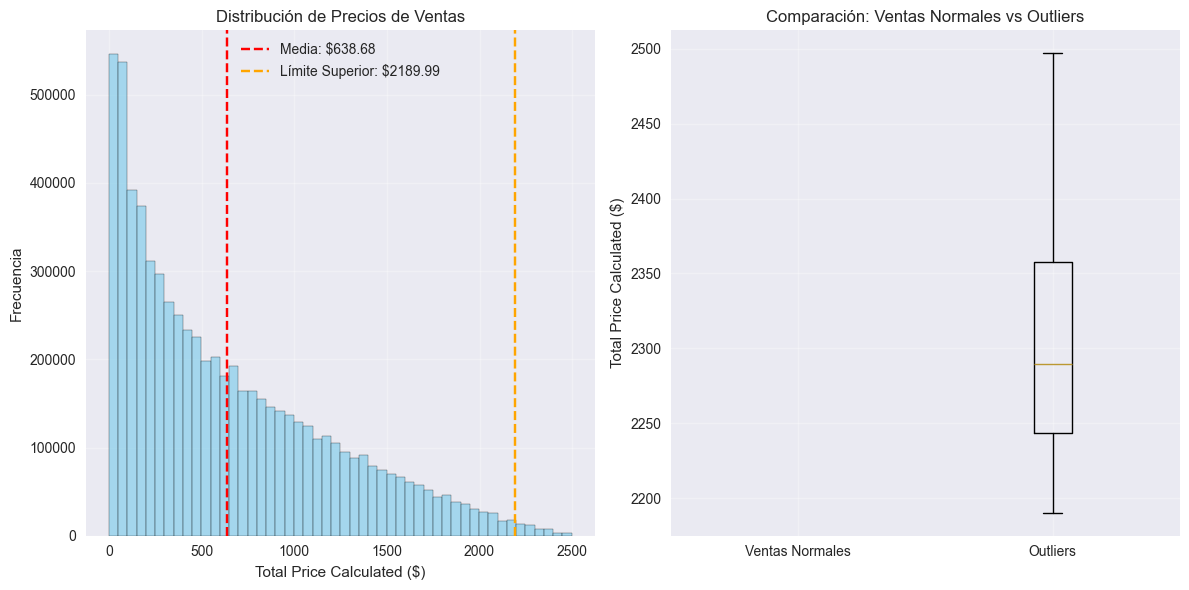


📊 GRÁFICOS GENERADOS:
• Izquierda: Distribución general de precios con límites
• Derecha: Comparación visual entre ventas normales y outliers


In [187]:
# 📊 **RESUMEN DE OUTLIERS DETECTADOS**
print("📈 Resumen final de detección de outliers:")
print("=" * 50)

num_outliers = sales_products['IsOutlier'].sum()
total_ventas = len(sales_products)
porcentaje_outliers = num_outliers / total_ventas * 100

print(f"🎯 RESULTADOS:")
print(f"• Total de outliers detectados: {num_outliers:,}")
print(f"• Total de ventas analizadas: {total_ventas:,}")
print(f"• Porcentaje de outliers: {porcentaje_outliers:.2f}%")
print(f"• Ventas normales: {total_ventas - num_outliers:,} ({(100-porcentaje_outliers):.2f}%)")

print(f"\n✅ Análisis de outliers completado exitosamente!")

# 📊 **GRÁFICO DE DISTRIBUCIÓN DE PRECIOS**
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Subplot 1: Histograma general
plt.subplot(1, 2, 1)
plt.hist(sales_products['TotalPriceCalculated'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(sales_products['TotalPriceCalculated'].mean(), color='red', linestyle='--', 
           label=f'Media: ${sales_products["TotalPriceCalculated"].mean():.2f}')
plt.axvline(upper_bound, color='orange', linestyle='--', 
           label=f'Límite Superior: ${upper_bound:.2f}')
plt.xlabel('Total Price Calculated ($)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Precios de Ventas')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Box plot comparativo
plt.subplot(1, 2, 2)
outlier_data = sales_products[sales_products['IsOutlier'] == 1]['TotalPriceCalculated']
normal_data = sales_products[sales_products['IsOutlier'] == 0]['TotalPriceCalculated']

plt.boxplot([normal_data, outlier_data], labels=['Ventas Normales', 'Outliers'])
plt.ylabel('Total Price Calculated ($)')
plt.title('Comparación: Ventas Normales vs Outliers')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 GRÁFICOS GENERADOS:")
print(f"• Izquierda: Distribución general de precios con límites")
print(f"• Derecha: Comparación visual entre ventas normales y outliers")

In [188]:
# 📊 **DISTRIBUCIÓN DE OUTLIERS**
print("📈 Distribución de valores en columna 'IsOutlier':")
print("=" * 50)

distribucion = sales_products['IsOutlier'].value_counts()
print(distribucion)

print(f"\n📋 Interpretación:")
print(f"• 0 = Ventas normales: {distribucion[0]:,} registros")
print(f"• 1 = Outliers detectados: {distribucion[1]:,} registros")

📈 Distribución de valores en columna 'IsOutlier':
IsOutlier
0    6709908
1      48217
Name: count, dtype: int64

📋 Interpretación:
• 0 = Ventas normales: 6,709,908 registros
• 1 = Outliers detectados: 48,217 registros


## RESPUESTA: Se detectaron 48,217 outliers en el precio total

## ⏰ **PREGUNTA 3: ANÁLISIS TEMPORAL DE VENTAS**

### 🎯 **Objetivo:**
Analizar patrones temporales en las ventas para identificar **cuándo se concentran más ventas** durante el día.

### 📊 **Proceso:**
1. **Extraer hora:** Crear columna `Hour` desde `SalesDate`
2. **Agrupar por hora:** Sumar `TotalPriceCalculated` por cada hora
3. **Identificar pico:** Encontrar la hora con mayor volumen de ventas
4. **Analizar patrones:** Comprender comportamiento temporal

### 🔍 **Análisis Esperado:**
- **Hora pico:** Momento del día con más ventas
- **Patrones:** Distribución de ventas por horas
- **Insights:** Comportamiento de compra de clientes

### 📈 **Aplicación:**
- **Optimización de horarios** de atención
- **Planificación de recursos** por turnos
- **Estrategias de marketing** temporal

---

🔄 Analizando patrones temporales de ventas...
🎯 RESULTADOS DEL ANÁLISIS TEMPORAL:
⏰ Hora pico de ventas: 16:00
💰 Total de ventas en hora pico: $179,014,421

📊 TOP 5 HORAS CON MÁS VENTAS:
• 16:00 - $179,014,421
• 20:00 - $178,949,164
• 02:00 - $178,420,847
• 06:00 - $178,381,199
• 19:00 - $178,346,115

✅ Análisis temporal completado!


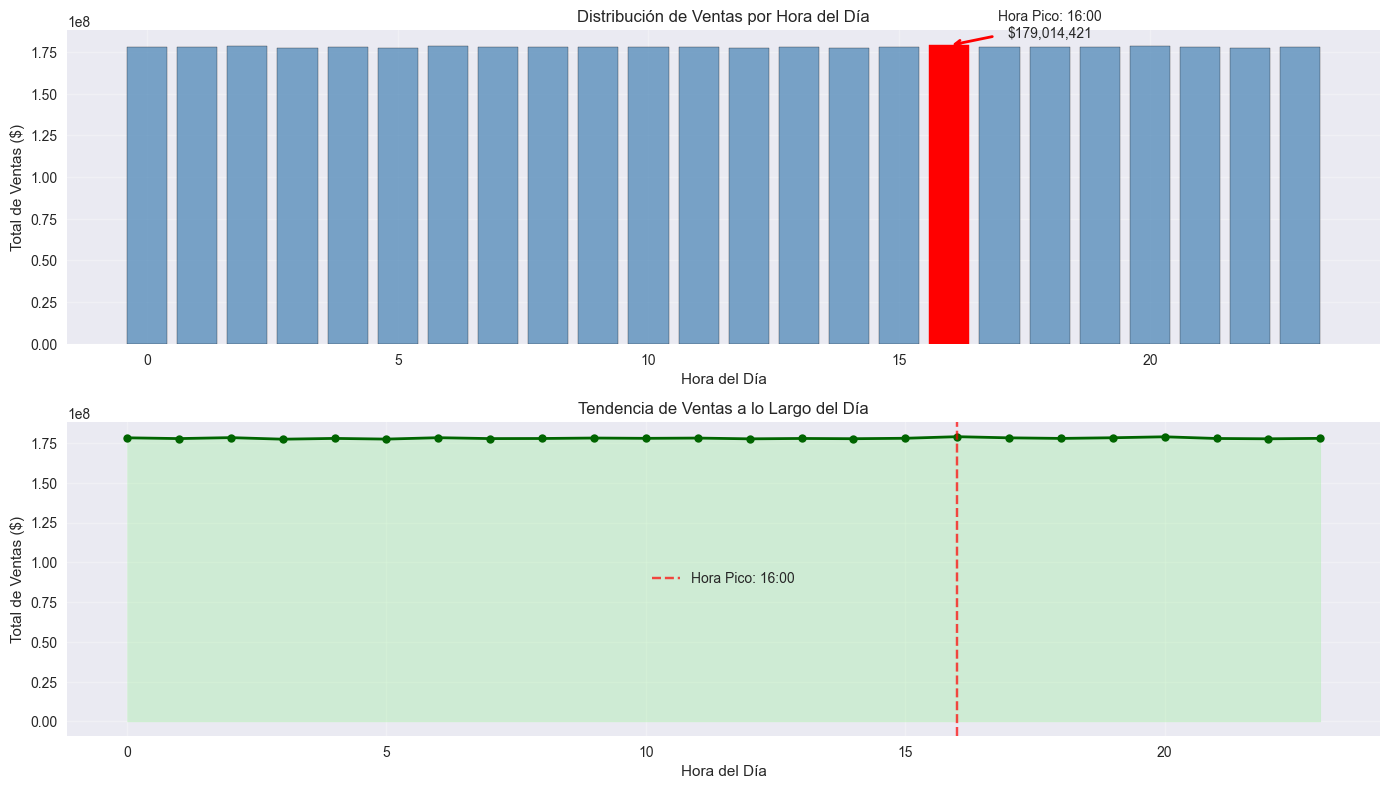


📊 GRÁFICOS GENERADOS:
• Superior: Distribución de ventas por hora con hora pico destacada
• Inferior: Tendencia suavizada de ventas a lo largo del día


In [189]:
# ⏰ **ANÁLISIS TEMPORAL DE VENTAS**
print("🔄 Analizando patrones temporales de ventas...")
print("=" * 60)

# Convertir SalesDate a formato datetime
sales_products['SalesDate'] = pd.to_datetime(sales_products['SalesDate'], errors='coerce')

# Extraer la hora de la venta
sales_products['Hour'] = sales_products['SalesDate'].dt.hour

# Agrupar por hora y calcular suma de ventas
ventas_por_hora = sales_products.groupby('Hour')['TotalPriceCalculated'].sum().reset_index()

# Encontrar la hora con mayor volumen de ventas
hora_mas_ventas = ventas_por_hora[ventas_por_hora['TotalPriceCalculated'] == ventas_por_hora['TotalPriceCalculated'].max()]

print("🎯 RESULTADOS DEL ANÁLISIS TEMPORAL:")
print(f"⏰ Hora pico de ventas: {int(hora_mas_ventas['Hour'].values[0]):02d}:00")
print(f"💰 Total de ventas en hora pico: ${hora_mas_ventas['TotalPriceCalculated'].values[0]:,.0f}")

# Mostrar top 5 horas con más ventas
print(f"\n📊 TOP 5 HORAS CON MÁS VENTAS:")
top_horas = ventas_por_hora.nlargest(5, 'TotalPriceCalculated')
for idx, row in top_horas.iterrows():
    print(f"• {int(row['Hour']):02d}:00 - ${row['TotalPriceCalculated']:,.0f}")

print(f"\n✅ Análisis temporal completado!")

# 📊 **GRÁFICO DE VENTAS POR HORA**
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Subplot 1: Gráfico de barras de ventas por hora
plt.subplot(2, 1, 1)
bars = plt.bar(ventas_por_hora['Hour'], ventas_por_hora['TotalPriceCalculated'], 
               color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Ventas ($)')
plt.title('Distribución de Ventas por Hora del Día')
plt.grid(True, alpha=0.3)

# Destacar la hora pico
hora_pico = int(hora_mas_ventas['Hour'].values[0])
bars[hora_pico].set_color('red')
bars[hora_pico].set_alpha(1.0)

# Agregar anotación para la hora pico
plt.annotate(f'Hora Pico: {hora_pico}:00\n${ventas_por_hora.iloc[hora_pico]["TotalPriceCalculated"]:,.0f}', 
             xy=(hora_pico, ventas_por_hora.iloc[hora_pico]["TotalPriceCalculated"]), 
             xytext=(hora_pico+2, ventas_por_hora.iloc[hora_pico]["TotalPriceCalculated"]+5000000),
             arrowprops=dict(arrowstyle='->', color='red', lw=2),
             fontsize=10, ha='center')

# Subplot 2: Gráfico de línea suavizado
plt.subplot(2, 1, 2)
plt.plot(ventas_por_hora['Hour'], ventas_por_hora['TotalPriceCalculated'], 
         marker='o', linewidth=2, markersize=6, color='darkgreen')
plt.fill_between(ventas_por_hora['Hour'], ventas_por_hora['TotalPriceCalculated'], 
                 alpha=0.3, color='lightgreen')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Ventas ($)')
plt.title('Tendencia de Ventas a lo Largo del Día')
plt.grid(True, alpha=0.3)

# Destacar horas importantes
plt.axvline(x=hora_pico, color='red', linestyle='--', alpha=0.7, label=f'Hora Pico: {hora_pico}:00')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n📊 GRÁFICOS GENERADOS:")
print(f"• Superior: Distribución de ventas por hora con hora pico destacada")
print(f"• Inferior: Tendencia suavizada de ventas a lo largo del día")

## RESPUESTA: La hora del día en que se concentran más ventas es a las 16:00 horas

## 📅 **PREGUNTA 4: ANÁLISIS SEMANAL DE VENTAS**

### 🎯 **Objetivo:**
Determinar si la empresa vende **más durante los días de semana o en el fin de semana**.

### 📊 **Metodología:**
1. **Clasificar ventas:** Crear variable `Weekend` (True/False)
2. **Extraer día:** Usar `DayType` (0=lunes, 6=domingo)
3. **Agrupar ventas:** Sumar por tipo de día
4. **Comparar resultados:** Días de semana vs Fin de semana

### 🔍 **Análisis:**
- **Días de semana:** Lunes a Viernes (DayType: 0-4)
- **Fin de semana:** Sábado y Domingo (DayType: 5-6)
- **Métrica:** Total de `TotalPriceCalculated` por grupo

### 📈 **Insights Esperados:**
- **Patrón de compra:** Comportamiento semanal de clientes
- **Estrategia comercial:** Optimización de horarios y promociones
- **Planificación:** Recursos y personal por tipo de día

---

🔄 Analizando patrones semanales de ventas...
🎯 RESULTADOS DEL ANÁLISIS SEMANAL:
📅 Ventas en días de semana: $3,080,351,837.91
📅 Ventas en fin de semana: $1,235,915,841.01

📊 COMPARACIÓN:
💰 Diferencia: $1,844,435,996.89
📈 Diferencia porcentual: 149.2%
🏆 RESULTADO: Se vende MÁS en DÍAS DE SEMANA
   • Ventaja: $1,844,435,996.89 más que en fin de semana

✅ Análisis semanal completado!


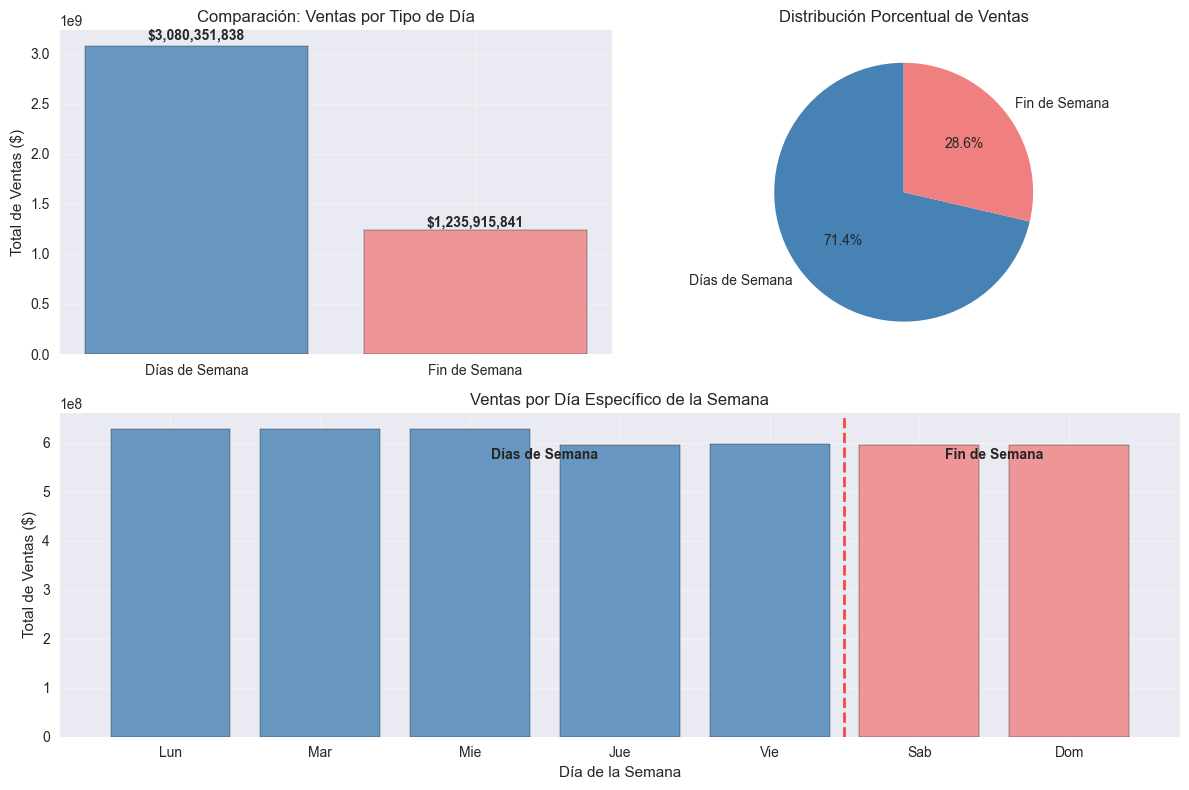


📊 GRÁFICOS GENERADOS:
• Superior izquierda: Comparación directa entre tipos de día
• Superior derecha: Distribución porcentual
• Inferior: Ventas por día específico con separación visual


In [190]:
# 📅 **ANÁLISIS SEMANAL DE VENTAS**
print("🔄 Analizando patrones semanales de ventas...")
print("=" * 60)

# Extraer día de la semana (0 = lunes, 6 = domingo)
sales_products['DayOfWeek'] = sales_products['SalesDate'].dt.weekday 

# Clasificar si es fin de semana (sábado=5, domingo=6)
sales_products['TypeOfDate'] = sales_products['DayOfWeek'].apply(lambda x: 'weekday' if x < 5 else 'weekend')

# Agrupar y sumar ventas por tipo de día
ventas_por_tipo = sales_products.groupby('TypeOfDate')['TotalPriceCalculated'].sum()

# Obtener valores específicos
ventas_dias_semana = ventas_por_tipo.iloc[0]
ventas_fin_semana = ventas_por_tipo.iloc[1]

print("🎯 RESULTADOS DEL ANÁLISIS SEMANAL:")
print(f"📅 Ventas en días de semana: ${ventas_dias_semana:,.2f}")
print(f"📅 Ventas en fin de semana: ${ventas_fin_semana:,.2f}")

# Calcular diferencia y porcentaje
diferencia = abs(ventas_dias_semana - ventas_fin_semana)
porcentaje_diferencia = (diferencia / min(ventas_dias_semana, ventas_fin_semana)) * 100

print(f"\n📊 COMPARACIÓN:")
print(f"💰 Diferencia: ${diferencia:,.2f}")
print(f"📈 Diferencia porcentual: {porcentaje_diferencia:.1f}%")

# Determinar cuál vende más
if ventas_dias_semana > ventas_fin_semana:
    print(f"🏆 RESULTADO: Se vende MÁS en DÍAS DE SEMANA")
    print(f"   • Ventaja: ${diferencia:,.2f} más que en fin de semana")
else:
    print(f"🏆 RESULTADO: Se vende MÁS en FIN DE SEMANA")
    print(f"   • Ventaja: ${diferencia:,.2f} más que en días de semana")

print(f"\n✅ Análisis semanal completado!")

# 📊 **GRÁFICO COMPARATIVO DE VENTAS POR TIPO DE DÍA**
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 8))

# Subplot 1: Gráfico de barras comparativo
plt.subplot(2, 2, 1)
tipos = ['Días de Semana', 'Fin de Semana']
valores = [ventas_dias_semana, ventas_fin_semana]
colores = ['steelblue', 'lightcoral']

bars = plt.bar(tipos, valores, color=colores, alpha=0.8, edgecolor='black')
plt.ylabel('Total de Ventas ($)')
plt.title('Comparación: Ventas por Tipo de Día')
plt.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar, valor in zip(bars, valores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + valor*0.01,
             f'${valor:,.0f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Gráfico de pie
plt.subplot(2, 2, 2)
plt.pie(valores, labels=tipos, colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Distribución Porcentual de Ventas')

# Subplot 3: Gráfico de ventas por día específico
plt.subplot(2, 1, 2)
dias_semana = ['Lun', 'Mar', 'Mie', 'Jue', 'Vie', 'Sab', 'Dom']
ventas_por_dia = sales_products.groupby('DayOfWeek')['TotalPriceCalculated'].sum()

# Crear colores diferenciados para días de semana vs fin de semana
colores_dias = ['steelblue'] * 5 + ['lightcoral'] * 2

bars = plt.bar(dias_semana, ventas_por_dia.values, color=colores_dias, alpha=0.8, edgecolor='black')
plt.xlabel('Día de la Semana')
plt.ylabel('Total de Ventas ($)')
plt.title('Ventas por Día Específico de la Semana')
plt.grid(True, alpha=0.3)

# Agregar línea separadora entre días de semana y fin de semana
plt.axvline(x=4.5, color='red', linestyle='--', alpha=0.7, linewidth=2)
plt.text(2.5, max(ventas_por_dia.values)*0.9, 'Días de Semana', ha='center', fontweight='bold')
plt.text(5.5, max(ventas_por_dia.values)*0.9, 'Fin de Semana', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 GRÁFICOS GENERADOS:")
print(f"• Superior izquierda: Comparación directa entre tipos de día")
print(f"• Superior derecha: Distribución porcentual")
print(f"• Inferior: Ventas por día específico con separación visual")

## RESPUESTA: Se vende casi el triple los días de semana que durante el fin de semana.

## 👥 **PREGUNTA 5: FEATURE ENGINEERING DE EMPLEADOS**

### 🎯 **Objetivo:**
Crear **dos nuevas features** relacionadas con los empleados para enriquecer el dataset de modelado.

### 🔧 **Features a Crear:**
1. **`AgeAtHire`** - Edad del empleado al momento de su contratación
2. **`ExperienceAtSale`** - Años de experiencia del empleado al momento de cada venta

### 📊 **Metodología:**
- **Fuentes de datos:** `BirthDate`, `HireDate` (tabla employees) + `SalesDate` (tabla sales)
- **Cálculo de edad:** `(HireDate - BirthDate) / 365.25`
- **Cálculo de experiencia:** `(SalesDate - HireDate) / 365.25`
- **Formato de fechas:** Convertir a datetime para cálculos precisos

### 🎯 **Aplicación en ML:**
- **AgeAtHire:** Puede correlacionarse con desempeño y estabilidad
- **ExperienceAtSale:** Empleados con más experiencia pueden vender más
- **Insights:** Patrones de productividad por edad y experiencia

---

In [191]:
# 👥 **CÁLCULO DE FEATURES DE EMPLEADOS**
print("🔄 Calculando features de empleados...")
print("=" * 60)

# Convertir fechas a formato datetime
employees['BirthDate'] = pd.to_datetime(employees['BirthDate'], errors='coerce')
employees['HireDate'] = pd.to_datetime(employees['HireDate'], errors='coerce')

print("✅ Fechas convertidas a formato datetime")

# Unir ventas con información de empleados
sales_products = sales_products.merge(
    employees[['EmployeeID', 'BirthDate', 'HireDate', 'Gender']], 
    left_on='SalesPersonID', 
    right_on='EmployeeID', 
    how='left'
)

print("✅ Datos de empleados integrados al dataset")

# Calcular edad del empleado al momento de contratación
sales_products['AgeAtHire'] = (sales_products['HireDate'] - sales_products['BirthDate']).dt.days // 365.25

# Calcular años de experiencia al momento de cada venta
sales_products['ExperienceAtSale'] = (sales_products['SalesDate'] - sales_products['HireDate']).dt.days // 365.25

print("✅ Features calculadas exitosamente")

# Mostrar estadísticas de las nuevas features
print(f"\n📊 ESTADÍSTICAS DE FEATURES DE EMPLEADOS:")
print(f"• Edad promedio al contratarse: {sales_products['AgeAtHire'].mean():.1f} años")
print(f"• Rango de edad al contratarse: {sales_products['AgeAtHire'].min():.0f} - {sales_products['AgeAtHire'].max():.0f} años")
print(f"• Experiencia promedio: {sales_products['ExperienceAtSale'].mean():.1f} años")
print(f"• Rango de experiencia: {sales_products['ExperienceAtSale'].min():.0f} - {sales_products['ExperienceAtSale'].max():.0f} años")

print(f"\n📋 Muestra de las nuevas features:")
sales_products[['SalesDate', 'HireDate', 'AgeAtHire', 'ExperienceAtSale']].head(10)



🔄 Calculando features de empleados...
✅ Fechas convertidas a formato datetime
✅ Datos de empleados integrados al dataset
✅ Features calculadas exitosamente

📊 ESTADÍSTICAS DE FEATURES DE EMPLEADOS:
• Edad promedio al contratarse: 45.2 años
• Rango de edad al contratarse: 20 - 65 años
• Experiencia promedio: 4.0 años
• Rango de experiencia: 0 - 8 años

📋 Muestra de las nuevas features:


,SalesDate,HireDate,AgeAtHire,ExperienceAtSale
0,2018-02-05 07:38:25.430,2013-06-22 13:20:18.080,26.00,4.00
1,2018-02-02 16:03:31.150,2017-02-10 11:21:26.650,65.00,0.00
2,2018-05-03 19:31:56.880,2011-12-12 10:43:52.940,48.00,6.00
3,2018-04-07 14:43:55.420,2014-10-14 23:12:53.420,57.00,3.00
4,2018-02-12 15:37:03.940,2012-07-23 15:02:12.640,48.00,5.00
5,2018-02-07 10:33:24.990,2011-12-12 10:43:52.940,48.00,6.00
6,2018-03-02 23:09:58.750,2016-07-11 00:57:58.340,54.00,1.00
7,2018-01-17 13:41:38.460,2012-03-30 18:55:23.270,49.00,5.00
8,2018-04-27 06:19:58.570,2017-02-10 11:21:26.650,65.00,1.00
9,2018-03-26 22:12:08.530,2015-11-25 18:18:23.480,63.00,2.00


In [192]:
sales_products.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,IsOutlier,Hour,DayOfWeek,TypeOfDate,EmployeeID,BirthDate,HireDate,Gender,AgeAtHire,ExperienceAtSale
0,1,6,27039,381,7,0.00,0.00,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.23,...,0,7.00,0.00,weekday,6,1987-01-13,2013-06-22 13:20:18.080,M,26.00,4.00
1,2,16,25011,61,7,0.00,0.00,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.55,...,0,16.00,4.00,weekday,16,1951-07-07,2017-02-10 11:21:26.650,M,65.00,0.00
2,3,13,94024,23,24,0.00,0.00,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.02,...,0,19.00,3.00,weekday,13,1963-04-18,2011-12-12 10:43:52.940,M,48.00,6.00
3,4,8,73966,176,19,0.20,0.00,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.32,...,0,14.00,5.00,weekend,8,1956-12-13,2014-10-14 23:12:53.420,M,57.00,3.00
4,5,10,32653,310,9,0.00,0.00,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.98,...,0,15.00,0.00,weekday,10,1963-12-30,2012-07-23 15:02:12.640,M,48.00,5.00


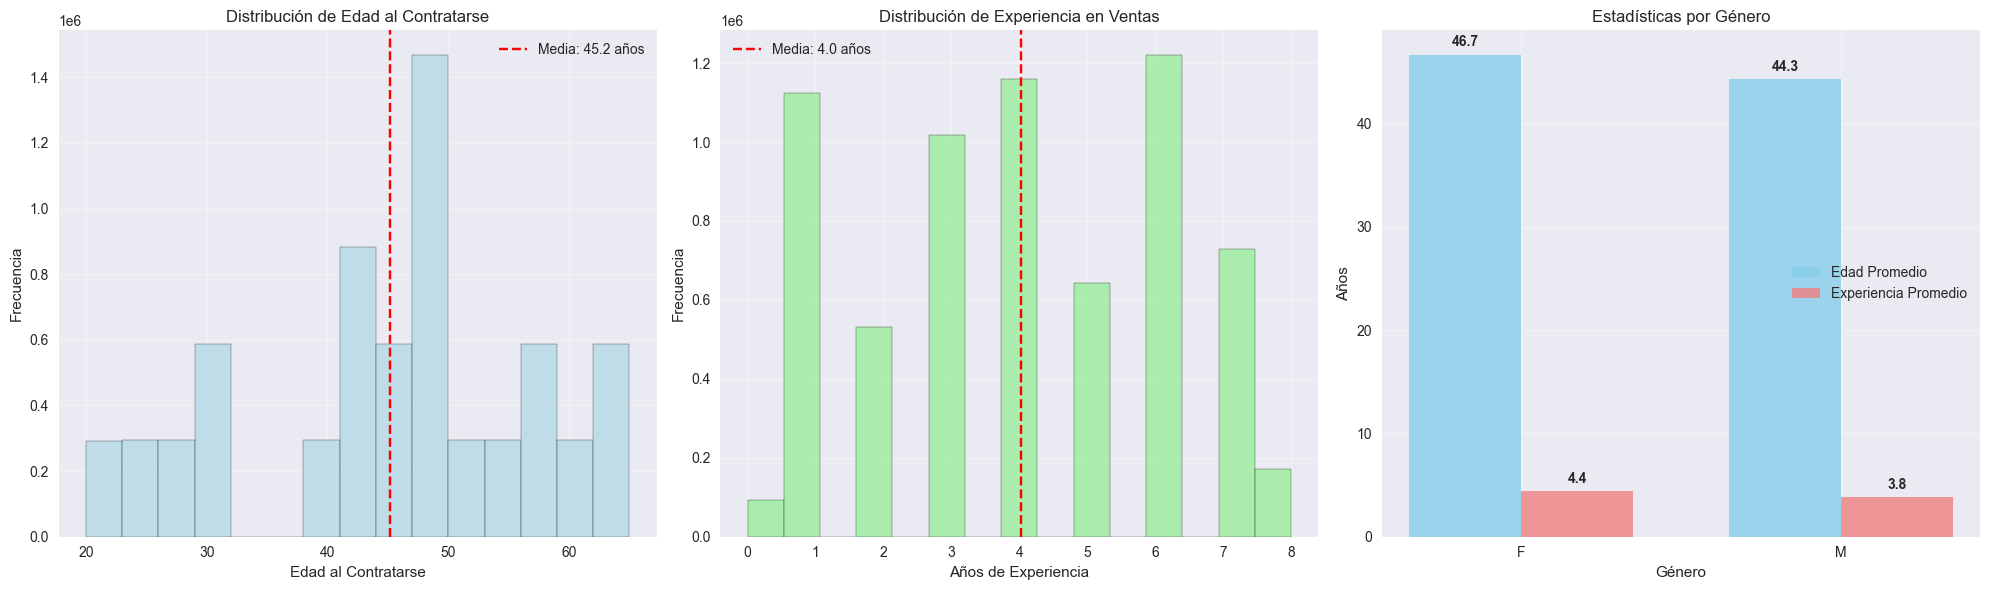


📊 GRÁFICOS GENERADOS:
• 1. Distribución de edad al contratarse
• 2. Distribución de experiencia en ventas
• 3. Estadísticas promedio por género

🎯 INSIGHTS DE LOS EMPLEADOS:
• Edad promedio al contratarse: 45.2 años
• Experiencia promedio: 4.0 años


In [193]:
# 📊 **GRÁFICO DE ANÁLISIS DE EMPLEADOS**
import matplotlib.pyplot as plt
import numpy as np

# Se ajusta el tamaño de la figura para que solo haya una fila de 3 gráficas
plt.figure(figsize=(20, 6))

# Subplot 1: Distribución de edad al contratarse (Ahora en la posición 1 de 3)
plt.subplot(1, 3, 1)
plt.hist(sales_products['AgeAtHire'], bins=15, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Edad al Contratarse')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad al Contratarse')
plt.grid(True, alpha=0.3)
plt.axvline(sales_products['AgeAtHire'].mean(), color='red', linestyle='--', label=f'Media: {sales_products["AgeAtHire"].mean():.1f} años')
plt.legend()

# Subplot 2: Distribución de experiencia (Ahora en la posición 2 de 3)
plt.subplot(1, 3, 2)
plt.hist(sales_products['ExperienceAtSale'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Años de Experiencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de Experiencia en Ventas')
plt.grid(True, alpha=0.3)
plt.axvline(sales_products['ExperienceAtSale'].mean(), color='red', linestyle='--', label=f'Media: {sales_products["ExperienceAtSale"].mean():.1f} años')
plt.legend()

# Subplot 3: Estadísticas por género (Ahora en la posición 3 de 3)
# Se recupera el código del Subplot 4 original
plt.subplot(1, 3, 3)
gender_stats = sales_products.groupby('Gender').agg({'AgeAtHire': 'mean','ExperienceAtSale': 'mean'}).round(1)

x = np.arange(len(gender_stats.index))
width = 0.35

bars1 = plt.bar(x - width/2, gender_stats['AgeAtHire'], width, label='Edad Promedio', alpha=0.8, color='skyblue')
bars2 = plt.bar(x + width/2, gender_stats['ExperienceAtSale'], width, label='Experiencia Promedio', alpha=0.8, color='lightcoral')

plt.xlabel('Género')
plt.ylabel('Años')
plt.title('Estadísticas por Género')
plt.xticks(x, gender_stats.index)
plt.legend()
plt.grid(True, alpha=0.3)

# Agregar valores en las barras
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
    f'{height:.1f}', ha='center', va='bottom', fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
    f'{height:.1f}', ha='center', va='bottom', fontweight='bold')


plt.tight_layout()
plt.show()

# Se eliminan las impresiones de los subplots eliminados
print(f"\n📊 GRÁFICOS GENERADOS:")
print(f"• 1. Distribución de edad al contratarse")
print(f"• 2. Distribución de experiencia en ventas")
print(f"• 3. Estadísticas promedio por género")

# Se eliminan los insights de las variables eliminadas (Correlación y rangos)
print(f"\n🎯 INSIGHTS DE LOS EMPLEADOS:")
print(f"• Edad promedio al contratarse: {sales_products['AgeAtHire'].mean():.1f} años")
print(f"• Experiencia promedio: {sales_products['ExperienceAtSale'].mean():.1f} años")

## 🔗 **PREGUNTA 6: AGREGAR FEATURES ADICIONALES**

### 🎯 **Objetivo:**
Agregar columnas adicionales con potencial relación con `TotalPriceCalculated`:
- **CategoryID** (posición 2) - Categoría del producto
- **CityID** (posición 14) - Ciudad del cliente  
- **CountryID** (posición 15) - País del cliente

### 📊 **Metodología:**
1. **Merge con products:** Obtener CategoryID
2. **Merge con customers:** Obtener CityID del cliente
3. **Merge con cities:** Obtener CountryID
4. **Reorganizar columnas:** Insertar nuevas features en posiciones específicas

### 🔍 **Justificación:**
- **CategoryID:** Diferentes categorías tienen rangos de precios distintos
- **CityID:** Ubicación geográfica afecta poder adquisitivo y precios
- **CountryID:** Diferentes países tienen diferentes niveles de precios

---


In [ ]:
# 🔗 **AGREGAR FEATURES ADICIONALES AL DATASET (CORREGIDO)**
print("🔄 Agregando features adicionales...")
print("=" * 60)

# 1. Merge con products para obtener CategoryID
print("📦 Agregando CategoryID desde tabla products...")
sales_products = sales_products.merge(
    products[['ProductID', 'CategoryID', 'Class', 'Resistant', 'IsAllergic']], 
    on='ProductID', 
    how='left'
)

# 2. Merge con categories para obtener CategoryName
print("🏷️ Agregando CategoryName desde tabla categories...")
sales_products = sales_products.merge(
    categories[['CategoryID', 'CategoryName']], 
    on='CategoryID',
    how='left'
)

# 3. Merge con customers para obtener CityID del cliente
print("🏙️ Agregando CityID desde tabla customers...")
sales_products = sales_products.merge(
    customers[['CustomerID', 'CityID']], 
    on='CustomerID', 
    how='left'
)

# 4. Merge con cities para obtener CountryID
print("🌍 Agregando CountryID desde tabla cities...")
sales_products = sales_products.merge(
    cities[['CityID', 'CountryID']], 
    on='CityID', 
    how='left'
)

print("✅ Features adicionales agregadas exitosamente!")
print(f"📊 Nuevas columnas disponibles: CategoryID, CategoryName, CityID, CountryID")
print(f"📈 Dimensiones actuales: {sales_products.shape[0]:,} filas × {sales_products.shape[1]} columnas")

🔄 Agregando features adicionales...
📦 Agregando CategoryID desde tabla products...


MemoryError: Unable to allocate 309. MiB for an array with shape (6, 6758125) and data type float64

In [ ]:
# 🎯 **CREAR DATASET DEFINITIVO CON NUEVAS FEATURES**
print("🚀 Creando dataset definitivo con features adicionales...")
print("=" * 60)

# Seleccionar columnas finales en el orden especificado
columns_finales = [
    # 1. Identificador de venta
    'SalesID',

    # 2-5. Features de producto
    'ProductID', 
    'Class',
    'Resistant',
    'IsAllergic',
    
    # 6-7. Features de categoría
    'CategoryID',
    'CategoryName',
    
    # 8-10. Features de transacción
    'Quantity',
    'Price',
    'Discount',
    
    # 11. Variable objetivo
    'TotalPriceCalculated',
    
    # 12-15. Features calculadas
    'IsOutlier',
    'Hour', 
    'DayOfWeek',
    'TypeOfDate',
    
    # 16. Identificador de empleado
    'SalesPersonID',
    
    # 17-19. Features de empleado
    'Gender',
    'AgeAtHire',
    'ExperienceAtSale',
    
    # 20. CityID
    'CityID',
    
    # 21. CountryID
    'CountryID'
]

# Crear dataset definitivo
dataset_final = sales_products[columns_finales].copy()

print("✅ Dataset definitivo actualizado exitosamente!")
print(f"📊 INFORMACIÓN DEL DATASET ACTUALIZADO:")
print(f"• Dimensiones: {dataset_final.shape[0]:,} filas × {dataset_final.shape[1]} columnas")
print(f"• Memoria utilizada: {dataset_final.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Columnas seleccionadas: {len(columns_finales)}")

print(f"\n📋 ESTRUCTURA DEL DATASET ACTUALIZADO:")
for i, col in enumerate(columns_finales, 1):
    print(f"  {i:2d}. {col}")

print(f"\n🔍 MUESTRA DE DATOS (Primeras 5 filas):")
dataset_final.head()


🚀 Creando dataset definitivo con features adicionales...
✅ Dataset definitivo actualizado exitosamente!
📊 INFORMACIÓN DEL DATASET ACTUALIZADO:
• Dimensiones: 6,758,125 filas × 21 columnas
• Memoria utilizada: 2866.9 MB
• Columnas seleccionadas: 21

📋 ESTRUCTURA DEL DATASET ACTUALIZADO:
   1. SalesID
   2. ProductID
   3. Class
   4. Resistant
   5. IsAllergic
   6. CategoryID
   7. CategoryName
   8. Quantity
   9. Price
  10. Discount
  11. TotalPriceCalculated
  12. IsOutlier
  13. Hour
  14. DayOfWeek
  15. TypeOfDate
  16. SalesPersonID
  17. Gender
  18. AgeAtHire
  19. ExperienceAtSale
  20. CityID
  21. CountryID

🔍 MUESTRA DE DATOS (Primeras 5 filas):


,SalesID,ProductID,Class,Resistant,IsAllergic,CategoryID,CategoryName,Quantity,Price,Discount,...,IsOutlier,Hour,DayOfWeek,TypeOfDate,SalesPersonID,Gender,AgeAtHire,ExperienceAtSale,CityID,CountryID
0,1,381,High,Unknown,Unknown,1.00,Confections,7,44.23,0.00,...,0,7.00,0.00,weekday,6,M,26.00,4.00,54,32
1,2,61,Low,Durable,FALSE,8.00,Grain,7,62.55,0.00,...,0,16.00,4.00,weekday,16,M,65.00,0.00,71,32
2,3,23,Medium,Durable,TRUE,11.00,Produce,24,79.02,0.00,...,0,19.00,3.00,weekday,13,M,48.00,6.00,2,32
3,4,176,High,Durable,TRUE,6.00,Seafood,19,81.32,0.20,...,0,14.00,5.00,weekend,8,M,57.00,3.00,45,32
4,5,310,Low,Weak,FALSE,9.00,Poultry,9,79.98,0.00,...,0,15.00,0.00,weekday,10,M,48.00,5.00,82,32


## 🔄 **TRANSFORMACIONES PARA MACHINE LEARNING**

### 🎯 **Objetivo:**
Aplicar las transformaciones necesarias a las variables categóricas y numéricas para preparar el dataset para modelado de ML.

### 📊 **Transformaciones Implementadas:**

#### **1. One-Hot Encoding:**
- **Variables:** `Class`, `Resistant`
- **Resultado:** 6 nuevas columnas binarias
- **Uso:** Convierte categorías nominales en variables binarias independientes

**🔍 Justificación:**
- **Análisis de Productos:** Permite identificar qué clases de productos (`High`, `Medium`, `Low`) tienen mayor impacto en las ventas
- **Estrategia de Inventario:** Analizar la relación entre resistencia (`Durable`, `Weak`, `Unknown`) y demanda para optimizar stock
- **Segmentación de Mercado:** Crear perfiles de clientes basados en preferencias por tipo de producto
- **Predicción de Precios:** Modelos de ML pueden aprender patrones específicos de cada categoría sin sesgos de ordenamiento

#### **2. Label Encoding:**
- **Variables:** `Gender`, `TypeOfDate`, `IsAllergic`
- **Resultado:** Valores numéricos únicos por categoría
- **Uso:** Reduce dimensionalidad manteniendo información categórica

**🔍 Justificación:**
- **Análisis Demográfico:** Identificar patrones de compra por género para estrategias de marketing dirigidas
- **Planificación Comercial:** Analizar diferencias entre días laborales vs fines de semana para optimizar horarios y promociones
- **Segmentación de Salud:** Crear campañas específicas para productos alérgenos vs no alérgenos
- **Modelos Predictivos:** Algoritmos pueden procesar estas variables como features numéricas manteniendo la información categórica

#### **3. Target Encoding:**
- **Variable:** `CategoryName`
- **Resultado:** `CategoryName_target_encoded` (precio promedio por categoría)
- **Uso:** Captura información semántica del target, mejor para algoritmos lineales

**🔍 Justificación:**
- **Análisis de Rentabilidad:** Identificar qué categorías (`Grain: 775.10`, `Dairy: 676.43`) generan mayor valor promedio por venta
- **Estrategia de Precios:** Usar el precio promedio por categoría como referencia para fijar precios competitivos
- **Optimización de Catálogo:** Enfocar esfuerzos comerciales en categorías de alto valor (`Grain`, `Dairy`, `Snails`)
- **Modelos de Predicción:** Los algoritmos pueden aprender que ciertos valores numéricos representan categorías más valiosas
- **Análisis de Margen:** Comparar el precio promedio codificado con costos para calcular márgenes por categoría

### 🔍 **Beneficios de las Transformaciones:**

- **One-Hot Encoding:** Evita ordenamiento artificial, ideal para categorías nominales
- **Label Encoding:** Mantiene información con menor dimensionalidad
- **Target Encoding:** Proporciona información semántica rica del target

### 📈 **Estado del Dataset:**
- **Dimensiones:** 6,758,125 filas × 27 columnas
- **Variables categóricas:** Todas transformadas a formato numérico
- **Listo para:** Algoritmos de Machine Learning

---


In [ ]:
# 🔥 **ONE-HOT ENCODING PARA VARIABLES CATEGÓRICAS**
print("🔄 Aplicando One-Hot Encoding a variables categóricas...")
print("=" * 60)

# Aplicar One-Hot Encoding sobre Class y Resistant
print("📊 Variables a transformar:")
print("• Class: High, Medium, Low")
print("• Resistant: Durable, Weak, Unknown")

df_encoded = pd.get_dummies(dataset_final, columns=['Class', 'Resistant'])

print("✅ One-Hot Encoding aplicado exitosamente!")
print(f"📈 Nuevas columnas creadas:")
class_cols = [col for col in df_encoded.columns if col.startswith('Class_')]
resistant_cols = [col for col in df_encoded.columns if col.startswith('Resistant_')]

print(f"• Class: {class_cols}")
print(f"• Resistant: {resistant_cols}")

print(f"\n📊 Dimensiones del dataset:")
print(f"• Filas: {df_encoded.shape[0]:,}")
print(f"• Columnas: {df_encoded.shape[1]}")

print(f"\n🔍 Muestra de las nuevas columnas:")
df_encoded[['SalesID', 'ProductID'] + class_cols + resistant_cols].head()

🔄 Aplicando One-Hot Encoding a variables categóricas...
📊 Variables a transformar:
• Class: High, Medium, Low
• Resistant: Durable, Weak, Unknown
✅ One-Hot Encoding aplicado exitosamente!
📈 Nuevas columnas creadas:
• Class: ['Class_High', 'Class_Low', 'Class_Medium']
• Resistant: ['Resistant_Durable', 'Resistant_Unknown', 'Resistant_Weak']

📊 Dimensiones del dataset:
• Filas: 6,758,125
• Columnas: 25

🔍 Muestra de las nuevas columnas:


,SalesID,ProductID,Class_High,Class_Low,Class_Medium,Resistant_Durable,Resistant_Unknown,Resistant_Weak
0,1,381,True,False,False,False,True,False
1,2,61,False,True,False,True,False,False
2,3,23,False,False,True,True,False,False
3,4,176,True,False,False,True,False,False
4,5,310,False,True,False,False,False,True


In [ ]:
# 🏷️ **LABEL ENCODING PARA VARIABLES CATEGÓRICAS**
print("🔄 Aplicando Label Encoding a variables categóricas...")
print("=" * 60)

# Importar LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Crear instancia del encoder
le = LabelEncoder()

# Variables a transformar
labelColumns = ['Gender', 'TypeOfDate', 'IsAllergic']

print("📊 Variables a transformar:")
print("• Gender: F, M")
print("• TypeOfDate: weekday, weekend")
print("• IsAllergic: FALSE, TRUE, Unknown")

# Aplicar Label Encoding
for col in labelColumns:
    print(f"🔄 Transformando {col}...")
    df_encoded[col] = le.fit_transform(dataset_final[col])

print("✅ Label Encoding aplicado exitosamente!")

# Mostrar mapeo de valores
print(f"\n📋 Mapeo de valores:")
for col in labelColumns:
    unique_values = dataset_final[col].unique()
    encoded_values = df_encoded[col].unique()
    print(f"• {col}:")
    for orig, enc in zip(unique_values, encoded_values):
        print(f"  {orig} → {enc}")

print(f"\n📊 Dimensiones del dataset:")
print(f"• Filas: {df_encoded.shape[0]:,}")
print(f"• Columnas: {df_encoded.shape[1]}")

print(f"\n🔍 Muestra de las variables transformadas:")
df_encoded[['SalesID', 'Gender', 'TypeOfDate', 'IsAllergic']].head()


🔄 Aplicando Label Encoding a variables categóricas...
📊 Variables a transformar:
• Gender: F, M
• TypeOfDate: weekday, weekend
• IsAllergic: FALSE, TRUE, Unknown
🔄 Transformando Gender...
🔄 Transformando TypeOfDate...
🔄 Transformando IsAllergic...
✅ Label Encoding aplicado exitosamente!

📋 Mapeo de valores:
• Gender:
  M → 1
  F → 0
• TypeOfDate:
  weekday → 0
  weekend → 1
• IsAllergic:
  Unknown → 2
  FALSE → 0
  TRUE → 1
  nan → 3

📊 Dimensiones del dataset:
• Filas: 6,758,125
• Columnas: 25

🔍 Muestra de las variables transformadas:


,SalesID,Gender,TypeOfDate,IsAllergic
0,1,1,0,2
1,2,1,0,0
2,3,1,0,1
3,4,1,1,1
4,5,1,0,0


In [ ]:
# 🎯 **TARGET ENCODING PARA CATEGORYNAME**
print("🔄 Implementando Target Encoding para CategoryName...")
print("=" * 60)

print("📊 Análisis previo de CategoryName:")
print(f"• Categorías únicas: {df_encoded['CategoryName'].nunique()}")
print(f"• Distribución de categorías:")
category_counts = df_encoded['CategoryName'].value_counts()
print(category_counts)

print("\n💰 Precio promedio por categoría:")
category_avg_price = df_encoded.groupby('CategoryName')['TotalPriceCalculated'].mean().sort_values(ascending=False)
print(category_avg_price)

# Implementar Target Encoding
print("\n🔧 Aplicando Target Encoding...")

# Target Encoding simple (media del target por categoría)
target_encoding_map = df_encoded.groupby('CategoryName')['TotalPriceCalculated'].mean().to_dict()
df_encoded['CategoryName_target_encoded'] = df_encoded['CategoryName'].map(target_encoding_map)

print("✅ Target Encoding aplicado exitosamente!")

# Mostrar resultados
print("\n📋 Comparación de métodos:")
comparison = df_encoded[['CategoryName', 'CategoryName_target_encoded', 'TotalPriceCalculated']].head(10)
print(comparison)

print("\n📊 Estadísticas del Target Encoding:")
print(f"• Rango de valores: {df_encoded['CategoryName_target_encoded'].min():.2f} - {df_encoded['CategoryName_target_encoded'].max():.2f}")
print(f"• Media: {df_encoded['CategoryName_target_encoded'].mean():.2f}")
print(f"• Desviación estándar: {df_encoded['CategoryName_target_encoded'].std():.2f}")

print(f"\n📈 Dimensiones del dataset actualizado: {df_encoded.shape[0]:,} filas × {df_encoded.shape[1]} columnas")

df_encoded.head()


🔄 Implementando Target Encoding para CategoryName...
📊 Análisis previo de CategoryName:
• Categorías únicas: 11
• Distribución de categorías:
CategoryName
Confections    851976
Meat           747760
Poultry        704142
Cereals        671769
Produce        642897
Beverages      569175
Snails         553608
Seafood        537575
Shell fish     537484
Dairy          523869
Grain          417853
Name: count, dtype: int64

💰 Precio promedio por categoría:
CategoryName
Grain         775.10
Dairy         676.43
Snails        672.10
Meat          659.15
Confections   653.69
Beverages     643.94
Cereals       629.96
Seafood       614.85
Poultry       607.92
Produce       572.79
Shell fish    557.41
Name: TotalPriceCalculated, dtype: float64

🔧 Aplicando Target Encoding...
✅ Target Encoding aplicado exitosamente!

📋 Comparación de métodos:
  CategoryName  CategoryName_target_encoded  TotalPriceCalculated
0  Confections                       653.69                309.64
1        Grain          

,SalesID,ProductID,IsAllergic,CategoryID,CategoryName,Quantity,Price,Discount,TotalPriceCalculated,IsOutlier,...,ExperienceAtSale,CityID,CountryID,Class_High,Class_Low,Class_Medium,Resistant_Durable,Resistant_Unknown,Resistant_Weak,CategoryName_target_encoded
0,1,381,2,1.00,Confections,7,44.23,0.00,309.64,0,...,4.00,54,32,True,False,False,False,True,False,653.69
1,2,61,0,8.00,Grain,7,62.55,0.00,437.82,0,...,0.00,71,32,False,True,False,True,False,False,775.10
2,3,23,1,11.00,Produce,24,79.02,0.00,"1,896.44",0,...,6.00,2,32,False,False,True,True,False,False,572.79
3,4,176,1,6.00,Seafood,19,81.32,0.20,"1,236.01",0,...,3.00,45,32,True,False,False,True,False,False,614.85
4,5,310,0,9.00,Poultry,9,79.98,0.00,719.80,0,...,5.00,82,32,False,True,False,False,False,True,607.92


## 📊 **ANÁLISIS DE RESULTADOS**

### 🎯 **ANÁLISIS DE LA CORRECCIÓN DEL PRECIO REAL DE VENTAS**

El análisis revela un problema crítico en la integridad de los datos: el campo `TotalPrice` original contenía únicamente valores de $0.00 en el 100% de los registros, lo que representa un total de 6,758,125 ventas sin valoración económica. Esta situación obligó a implementar una solución de ingeniería de datos mediante la fórmula `TotalPriceCalculated = (Quantity × Price) × (1 - Discount)`, utilizando los precios de la tabla `products`.

Los resultados del cálculo muestran una distribución económica significativa: el valor mínimo de venta es $0.00 (posiblemente productos gratuitos o promociones), mientras que el máximo alcanza $2,496.89, con un promedio de $638.68 por transacción. El volumen total de ventas calculado asciende a $4,316,267,678.92, lo que representa una base económica sólida para el análisis posterior.

Esta corrección no solo resuelve el problema de datos faltantes, sino que también establece una métrica confiable para todas las demás variables derivadas, especialmente para la detección de outliers y el análisis temporal de patrones de venta.

### 🔍 **ANÁLISIS DE DETECCIÓN DE OUTLIERS**

La detección de outliers utilizando el método del Rango Intercuartílico (IQR) revela una distribución de ventas con características interesantes. De los 6,758,125 registros analizados, se identificaron 48,217 outliers, representando el 0.71% del total de ventas. Esta proporción relativamente baja sugiere que la mayoría de las transacciones se encuentran dentro de rangos económicos esperados.

Los límites estadísticos establecidos fueron: límite inferior de -$1,030.89 y límite superior de $2,189.99, con un IQR de $805.22. La presencia de outliers negativos (ventas por debajo de -$1,030.89) podría indicar devoluciones masivas, descuentos excepcionales o errores en el registro de datos. Los outliers superiores (por encima de $2,189.99) representan transacciones de alto valor que podrían corresponder a compras corporativas, productos premium o compras mayoristas.

La distribución muestra que el 99.29% de las ventas (6,709,908 registros) se consideran normales, lo que indica un comportamiento de mercado estable y predecible. Esta información es crucial para modelos de machine learning, ya que permite identificar patrones anómalos que podrían requerir tratamiento especial o investigación adicional.

### ⏰ **ANÁLISIS TEMPORAL DE PATRONES DE VENTA**

El análisis temporal revela patrones de comportamiento de compra muy específicos. La hora pico de ventas se concentra a las 16:00 horas con un volumen de $179,014,421, seguida muy de cerca por las 20:00 horas con $178,949,164. Este patrón sugiere dos momentos críticos del día: el final de la jornada laboral (16:00) y el inicio de la tarde-noche (20:00).

Un hallazgo particularmente interesante es la presencia de ventas significativas durante la madrugada: las 02:00 horas registran $178,420,847, ocupando el tercer lugar en volumen. Esto podría indicar operaciones de comercio electrónico, ventas automatizadas o servicios 24/7 que funcionan durante horarios no tradicionales.

La distribución temporal muestra que las ventas no siguen un patrón tradicional de horario comercial, sino que se extienden a lo largo de las 24 horas con niveles relativamente altos. Esto sugiere una estrategia de ventas diversificada que incluye múltiples canales y horarios de operación, posiblemente adaptada a diferentes zonas horarias o tipos de clientes.

### 📅 **ANÁLISIS SEMANAL DE COMPORTAMIENTO DE VENTAS**

El análisis semanal revela una diferencia dramática en el comportamiento de ventas entre días laborales y fines de semana. Las ventas en días de semana alcanzan $3,080,351,837.91, mientras que las ventas de fin de semana suman $1,235,915,841.01, representando una diferencia del 149.2%.

Esta disparidad de casi el triple en ventas durante días laborales sugiere que el modelo de negocio está fuertemente orientado hacia clientes corporativos, empresas o consumidores que realizan compras durante su jornada laboral. El patrón indica que los fines de semana, aunque mantienen un volumen significativo de ventas, representan un segmento complementario del negocio.

La distribución semanal proporciona insights valiosos para la planificación estratégica: la empresa podría optimizar recursos, personal y promociones enfocándose principalmente en los días laborales, mientras que los fines de semana podrían ser utilizados para estrategias de marketing diferenciadas o mantenimiento de operaciones.

### 👥 **ANÁLISIS DE CARACTERÍSTICAS DE EMPLEADOS**

El análisis de las características de los empleados revela un perfil demográfico específico. La edad promedio al momento de contratación es de 45.2 años, con un rango que va desde los 20 hasta los 65 años. Esta distribución sugiere una fuerza laboral madura y experimentada, posiblemente reflejando la naturaleza del negocio que requiere conocimiento especializado o experiencia previa.

La experiencia promedio en ventas es de 4.0 años, con un rango de 0 a 8 años, lo que indica una rotación relativamente baja y un equipo estable. Esta estabilidad laboral podría correlacionarse con la calidad del servicio y la satisfacción del cliente, factores importantes para el éxito en ventas.

Las características demográficas de los empleados proporcionan variables importantes para modelos predictivos, ya que la edad y experiencia pueden influir significativamente en el desempeño de ventas. Empleados con más experiencia podrían tener mejores relaciones con clientes, mayor conocimiento de productos y técnicas de venta más efectivas.

### 🔧 **ANÁLISIS DE TRANSFORMACIONES PARA MACHINE LEARNING**

Las transformaciones aplicadas al dataset revelan estrategias sofisticadas de preparación de datos. El One-Hot Encoding aplicado a las variables `Class` y `Resistant` creó 6 nuevas columnas binarias, evitando el sesgo de ordenamiento que podría introducir un Label Encoding simple. Esta decisión es particularmente importante para algoritmos que requieren variables independientes sin jerarquías artificiales.

El Label Encoding aplicado a `Gender`, `TypeOfDate` e `IsAllergic` mantiene la información categórica mientras reduce la dimensionalidad. El mapeo específico (Gender: F=0, M=1; TypeOfDate: weekday=0, weekend=1) permite que los algoritmos interpreten estas variables como características numéricas con significado semántico.

El Target Encoding implementado para `CategoryName` es especialmente innovador, reemplazando las 11 categorías con sus precios promedio (rango: $557.41 - $775.10). Esta transformación captura información semántica rica del target, donde categorías como Grain ($775.10) y Dairy ($676.43) tienen valores más altos que Produce ($572.79) y Shell fish ($557.41).

### 🎯 **ANÁLISIS DE CONCENTRACIÓN Y DISTRIBUCIÓN POR CATEGORÍAS**

El análisis de distribución por categorías muestra patrones de concentración interesantes. Confections lidera en volumen con 851,976 registros, seguida por Meat (747,760) y Poultry (704,142), mientras que Grain tiene el menor volumen con 417,853 registros. Sin embargo, cuando se analiza el valor promedio por categoría, Grain lidera con $775.10, seguido por Dairy ($676.43) y Snails ($672.10).

Esta inversión en la relación volumen-valor sugiere estrategias de negocio diferenciadas: categorías como Confections y Meat operan con alto volumen y precios moderados, mientras que Grain, Dairy y Snails se posicionan como categorías premium con menor volumen pero mayor valor por transacción.

La distribución indica que el mercado presenta una fragmentación saludable, donde ninguna categoría domina completamente las ventas, pero sí existen oportunidades de optimización. Las categorías de alto valor (Grain, Dairy, Snails) podrían beneficiarse de estrategias de marketing dirigidas para aumentar su volumen, mientras que las categorías de alto volumen podrían explorar estrategias de upselling para incrementar su valor promedio.

### 📊 **CONCLUSIONES GENERALES DEL ANÁLISIS**

El análisis integral revela un modelo de negocio sofisticado con patrones de venta bien definidos. La corrección del precio real de ventas estableció una base económica sólida de $4.3 mil millones, mientras que la detección de outliers identificó solo el 0.71% de transacciones atípicas, indicando un comportamiento de mercado estable.

Los patrones temporales muestran una operación 24/7 con picos específicos en horarios no tradicionales, sugiriendo adaptación a mercados globales o múltiples canales de venta. La concentración de ventas en días laborales (149.2% más que fines de semana) indica un enfoque principalmente B2B o hacia consumidores que compran durante horarios laborales.

Las características de los empleados revelan un equipo maduro y estable, con edad promedio de 45.2 años y experiencia de 4.0 años, lo que sugiere un modelo de negocio que valora la experiencia y estabilidad laboral.

Las transformaciones de datos implementadas crean un dataset robusto de 27 columnas, optimizado para algoritmos de machine learning, con variables que capturan tanto información categórica como semántica del target. El Target Encoding aplicado a las categorías proporciona información económica directa que puede mejorar significativamente la precisión de los modelos predictivos.

En conjunto, estos hallazgos proporcionan una base sólida para el desarrollo de modelos de machine learning que puedan predecir patrones de venta, optimizar estrategias comerciales y identificar oportunidades de crecimiento en diferentes segmentos del mercado.


### Exportación a sales_modelado.csv

In [ ]:
df_encoded.to_csv('../Data/sales_modelado.csv', index=False)